# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [69]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [70]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [71]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [72]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [73]:
from sklearn.model_selection import train_test_split

X = data.drop('MEDV', axis=1)  
y = data['MEDV']         
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")


Tamaño del conjunto de entrenamiento: (404, 13)
Tamaño del conjunto de prueba: (102, 13)


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()

model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)

y_test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Error cuadrático medio en el conjunto de entrenamiento: {mse_train:.2f}")
print(f"Error cuadrático medio en el conjunto de prueba: {mse_test:.2f}")



Error cuadrático medio en el conjunto de entrenamiento: 21.64
Error cuadrático medio en el conjunto de prueba: 24.29


## 3. Calculate and print R-squared for both the training and the testing set.

In [75]:
r2_train = model.score(X_train, y_train)

r2_test = model.score(X_test, y_test)

print(f"Coeficiente R^2 en el conjunto de entrenamiento: {r2_train:.2f}")
print(f"Coeficiente R^2 en el conjunto de prueba: {r2_test:.2f}")



Coeficiente R^2 en el conjunto de entrenamiento: 0.75
Coeficiente R^2 en el conjunto de prueba: 0.67


## 4. Calculate and print mean squared error for both the training and the testing set.

In [76]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Error cuadrático medio en el conjunto de entrenamiento: {mse_train:.2f}")
print(f"Error cuadrático medio en el conjunto de prueba: {mse_test:.2f}")


Error cuadrático medio en el conjunto de entrenamiento: 21.64
Error cuadrático medio en el conjunto de prueba: 24.29


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [77]:
from sklearn.metrics import mean_absolute_error

mae_train = mean_absolute_error(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"Error absoluto medio en el conjunto de entrenamiento: {mae_train:.2f}")
print(f"Error absoluto medio en el conjunto de prueba: {mae_test:.2f}")


Error absoluto medio en el conjunto de entrenamiento: 3.31
Error absoluto medio en el conjunto de prueba: 3.19


## Classification Model Evaluation

In [78]:
from sklearn.datasets import load_iris
data = load_iris()

In [79]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [80]:
column_names = data.feature_names

In [81]:
df = pd.DataFrame(data['data'],columns=column_names)

In [82]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [83]:
target = pd.DataFrame(data.target)

In [84]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [85]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [86]:
from sklearn.model_selection import train_test_split

X = data['data']  
y = data['target'] 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")


Tamaño del conjunto de entrenamiento: 120 muestras
Tamaño del conjunto de prueba: 30 muestras


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=200, random_state=42)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.2f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.2f}")


Precisión en el conjunto de entrenamiento: 0.97
Precisión en el conjunto de prueba: 0.97


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [88]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.2f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.2f}")


Precisión en el conjunto de entrenamiento: 0.97
Precisión en el conjunto de prueba: 0.97


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [89]:
from sklearn.metrics import balanced_accuracy_score

train_balanced_accuracy = balanced_accuracy_score(y_train, y_train_pred)
test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)

print(f"Precisión balanceada en el conjunto de entrenamiento: {train_balanced_accuracy:.2f}")
print(f"Precisión balanceada en el conjunto de prueba: {test_balanced_accuracy:.2f}")


Precisión balanceada en el conjunto de entrenamiento: 0.97
Precisión balanceada en el conjunto de prueba: 0.97


## 10. Calculate and print the precision score for both the training and the testing set.

In [90]:
from sklearn.metrics import precision_score

train_precision = precision_score(y_train, y_train_pred, average='macro')
test_precision = precision_score(y_test, y_test_pred, average='macro')

print(f"Precisión en el conjunto de entrenamiento: {train_precision:.2f}")
print(f"Precisión en el conjunto de prueba: {test_precision:.2f}")



Precisión en el conjunto de entrenamiento: 0.98
Precisión en el conjunto de prueba: 0.97


## 11. Calculate and print the recall score for both the training and the testing set.

In [91]:
from sklearn.metrics import recall_score

train_recall = recall_score(y_train, y_train_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')

print(f"Recuperación en el conjunto de entrenamiento: {train_recall:.2f}")
print(f"Recuperación en el conjunto de prueba: {test_recall:.2f}")


Recuperación en el conjunto de entrenamiento: 0.97
Recuperación en el conjunto de prueba: 0.97


## 12. Calculate and print the F1 score for both the training and the testing set.

In [92]:
from sklearn.metrics import f1_score

train_f1 = f1_score(y_train, y_train_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')

print(f"F1 score en el conjunto de entrenamiento: {train_f1:.2f}")
print(f"F1 score en el conjunto de prueba: {test_f1:.2f}")


F1 score en el conjunto de entrenamiento: 0.97
F1 score en el conjunto de prueba: 0.97


## 13. Generate confusion matrices for both the training and the testing set.

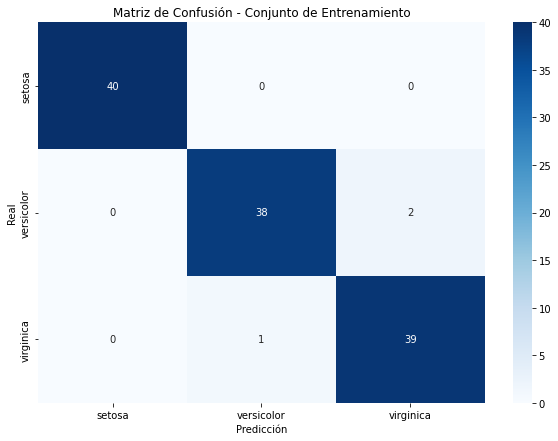

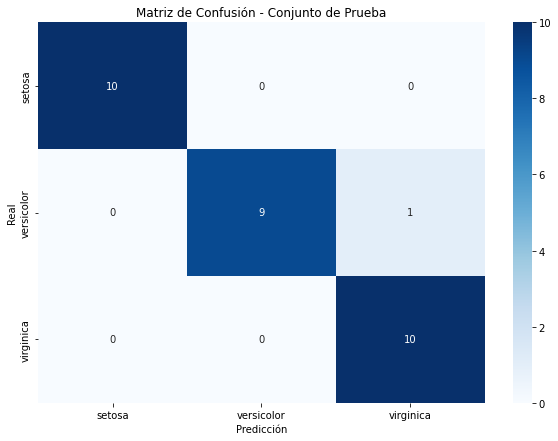

In [93]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Matriz de Confusión - Conjunto de Entrenamiento')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

plt.figure(figsize=(10, 7))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Matriz de Confusión - Conjunto de Prueba')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [94]:
# Have fun here !